In [1]:
push!(LOAD_PATH, "..")

using ASE
using MatSciPy
using PyPlot
using PyCall
using TightBinding

import NRLTB
BOHR = 0.52917721092

0.52917721092

### Plot hopping functions for Hamiltonian/overlap

lattice constant of Si = 5

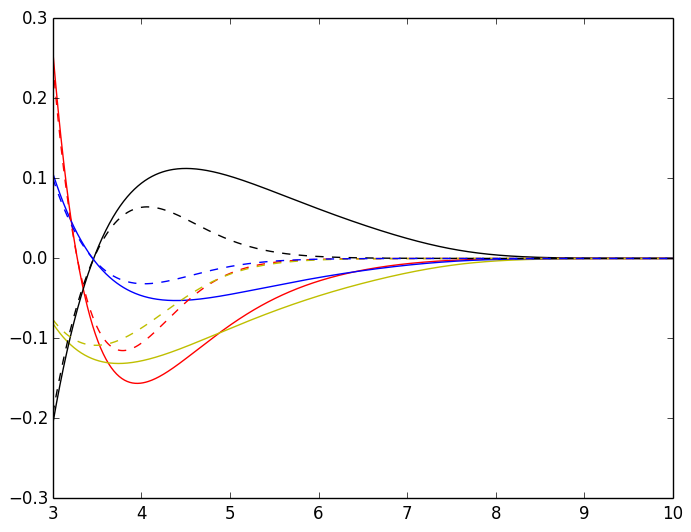

.43
 original curtoff radius = 12.5
 reduced cutoff radius = 9.375

In [25]:
reload("NRLTB")

x = 3.0:0.01:10.0
y1 = zeros(length(x))
y2 = zeros(length(x))
y3 = zeros(length(x))
y4 = zeros(length(x))
for k = 1:length(x)
    y1[k] = NRLTB.h_hop(x[k], 1, NRLTB.Si_sp)
    y2[k] = NRLTB.h_hop(x[k], 2, NRLTB.Si_sp)
    y3[k] = NRLTB.h_hop(x[k], 3, NRLTB.Si_sp)
    y4[k] = NRLTB.h_hop(x[k], 4, NRLTB.Si_sp)
end
plot(x,y1,"r-")
plot(x,y2,"y-")
plot(x,y3,"k-")
plot(x,y4,"b-")


# compare the hamiltonian matrix elements with different cutoff radius
Rc = NRLTB.Si_sp.Rc
NRLTB.Si_sp.Rc = Rc * 3/4

z1 = zeros(length(x))
z2 = zeros(length(x))
z3 = zeros(length(x))
z4 = zeros(length(x))
for k = 1:length(x)
    z1[k] = NRLTB.h_hop(x[k], 1, NRLTB.Si_sp)
    z2[k] = NRLTB.h_hop(x[k], 2, NRLTB.Si_sp)
    z3[k] = NRLTB.h_hop(x[k], 3, NRLTB.Si_sp)
    z4[k] = NRLTB.h_hop(x[k], 4, NRLTB.Si_sp)
end
plot(x,z1,"r--")
plot(x,z2,"y--")
plot(x,z3,"k--")
plot(x,z4,"b--")


print("lattice constant of Si = ", 5.43, "\n")
print(" original curtoff radius = ", Rc, "\n reduced cutoff radius = ", NRLTB.Si_sp.Rc)

## bond length of Aluminum

In [28]:
# create the supercell
reload("NRLTB")

n = 3
at = bulk("Al"; cubic=true)
at = repeat(at, (n, n, n))
set_pbc!(at, [true, true, true])

X = positions(at)
print("number of atoms = ", length(at), "\n")

CELL = get_cell(at)
bond = CELL[1]/n
print("lattice constant = ", bond)

number of atoms = 108
lattice constant = 4.05

In [32]:
# set the fermi level
reload("TightBinding")
reload("NRLTB")

tbm = NRLTB.NRLTBModel(elem = NRLTB.Al_spd)
tbm.potential.beta = 50

TightBinding.potential_energy(at, tbm)
tbm.fixed_eF = false
TightBinding.update_eF!(at, tbm)
EF = tbm.eF

1.2004059507766591

In [7]:
# compute total energy with different cell size

# NOTE: For Al, it is very necessary to adjust the fermi level for different systems

m = 13
x = zeros(m)
y = zeros(m)

for k = 1:m    
    ratio = 1.0 + (k-2) * 0.1
    set_positions!(at, X * ratio)
    set_cell!(at, CELL * ratio)
    
    TightBinding.update!(at, tbm)
    print(tbm.eF)
    
    x[k] = bond * ratio
    y[k] = TightBinding.potential_energy(at, tbm)
    println("\t ratio = ", ratio, "\t energy = ", y[k])
end

1.463119458437378	 ratio = 0.9	 energy = 1488.0131457983784
1.1849193989995597	 ratio = 1.0	 energy = 1196.2040410817326
1.0176371260567376	 ratio = 1.1	 energy = 1021.8496101330011
0.9425181153290498	 ratio = 1.2	 energy = 926.933791343571
0.9182682467587087	 ratio = 1.3	 energy = 879.8496297834662
0.9250570860339956	 ratio = 1.4	 energy = 858.3457102191409
0.9449491732562654	 ratio = 1.5	 energy = 850.4242213608374
0.9645449457377067	 ratio = 1.6	 energy = 849.0830306579605
0.978876663626219	 ratio = 1.7000000000000002	 energy = 850.4098263198781
0.9873987190863462	 ratio = 1.8	 energy = 852.0787488639514
0.9916095348768792	 ratio = 1.9	 energy = 852.9682635429407
0.9933274725890894	 ratio = 2.0	 energy = 853.0605650396055
0.9937523452796602	 ratio = 2.1	 energy = 852.7348604690209


In [ ]:
###### perform the same calculations with smaller cutoff radius
# reduce the cutoff radius by 1/6

# set the fermi level
reload("NRLTB")

Rc = NRLTB.Al_spd.Rc
NRLTB.Al_spd.Rc = Rc * 2/3
print(" original curtoff radius = ", Rc, "\n reduced cutoff radius = ", NRLTB.Si_sp.Rc)

set_pbc!(at, [true, true, true])
tbm = NRLTB.NRLTBModel(elem = NRLTB.Al_spd)
tbm.potential.beta = 50

TightBinding.potential_energy(at, tbm)
tbm.fixed_eF = false
TightBinding.update_eF!(at, tbm)
EF = tbm.eF

In [ ]:
# compute total energy with different cell size
reload("NRLTB")

# compare the hamiltonian matrix elements with different cutoff radius
Rc = NRLTB.Al_spd.Rc
NRLTB.Al_spd.Rc = Rc * 2/3
print(" original curtoff radius = ", Rc, "\n reduced cutoff radius = ", NRLTB.Al_spd.Rc)

m = 13
x = zeros(m)
z = zeros(m)

for k = 1:m    
    ratio = 1.0 + (k-5) * 0.02
    set_positions!(at, X * ratio)
    set_cell!(at, CELL * ratio)
    
    x[k] = bond * ratio
    z[k] = TightBinding.potential_energy(at, tbm)
    println("ratio = ", ratio, "  energy = ", y[k],"\n")
end

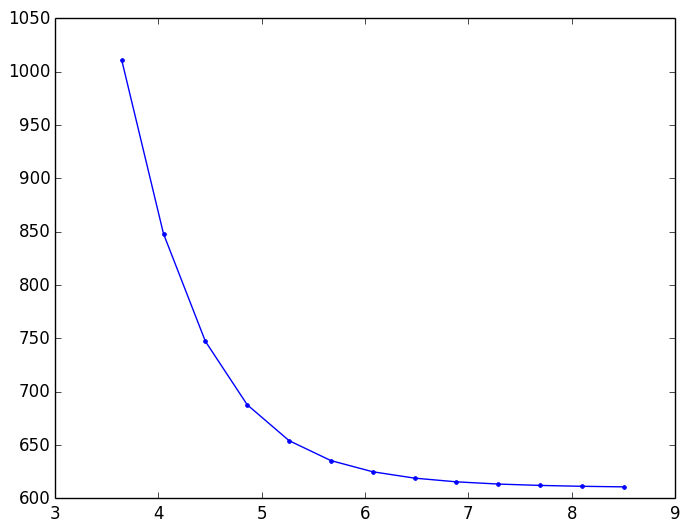

1-element Array{Any,1}:
 PyObject <matplotlib.lines.Line2D object at 0x5df2550>

In [10]:
plot(x,y,".-")

### bond length of carbon

In [2]:
# create the supercell
n = 3

at = bulk("C"; cubic=true)
at = repeat(at, (n, n, n))
set_pbc!(at, [true, true, true])

X = positions(at)
print("number of atoms = ", length(at), "\n")

CELL = get_cell(at)
bond = CELL[1]/n
print("lattice constant = ", bond)

number of atoms = 216
lattice constant = 3.57

In [6]:
# set the fermi level

tbm = NRLTB.NRLTBModel(elem = NRLTB.C_sp)
tbm.potential.beta = 200

TightBinding.potential_energy(at, tbm)
tbm.fixed_eF = false
TightBinding.update_eF!(at, tbm)
EF = tbm.eF

0.6392069108341737

In [7]:
# compute total energy with different cell size

m = 11
x = zeros(m)
y = zeros(m)

for k = 1:m    
    ratio = 1.0 + (k-6) * 0.03
    set_positions!(at, X * ratio)
    set_cell!(at, CELL * ratio)
    
    # update the fermi level, which is necessary when the temperature is now very low
    # TightBinding.update!(at, tbm)
    
    x[k] = bond * ratio
    y[k] = TightBinding.potential_energy(at, tbm)
    println("ratio = ", ratio, "\t  energy = ", y[k])
end

ratio = 0.85	  energy = 67.64576561664973
ratio = 0.88	  energy = 47.40792872629426
ratio = 0.91	  energy = 33.526033241046086
ratio = 0.94	  energy = 24.464788626021107
ratio = 0.97	  energy = 19.13674237370315
ratio = 1.0	  energy = 16.760142336013725
ratio = 1.03	  energy = 16.744222445645047
ratio = 1.06	  energy = 18.622950260205457
ratio = 1.09	  energy = 22.020684697823746
ratio = 1.12	  energy = 26.631012590985513
ratio = 1.15	  energy = 32.19858349419396


In [8]:
###### perform the same calculations with smaller cutoff radius
# reduce the cutoff radius by 1/8
reload("NRLTB")

# reset the atoms
at = bulk("C"; cubic=true)
at = repeat(at, (n, n, n))
set_pbc!(at, [true, true, true])
X = positions(at)
CELL = get_cell(at)
bond = CELL[1]/n


# set the fermi level
Rc = NRLTB.C_sp.Rc
NRLTB.C_sp.Rc = Rc * 7/8
print(" original curtoff radius = ", Rc, "\n reduced cutoff radius = ", NRLTB.C_sp.Rc, "\n")

tbm = NRLTB.NRLTBModel(elem = NRLTB.C_sp)
tbm.potential.beta = 200

TightBinding.potential_energy(at, tbm)
tbm.fixed_eF = false
TightBinding.update_eF!(at, tbm)
println(tbm.eF)

 original curtoff radius = 10.5
 reduced cutoff radius = 9.1875
0.6243873450148406


In [9]:
# compute total energy with different cell size
# reload("NRLTB")

m = 11
x = zeros(m)
z = zeros(m)

for k = 1:m    
    ratio = 1.0 + (k-6) * 0.03
    set_positions!(at, X * ratio)
    set_cell!(at, CELL * ratio)
    
    # update the fermi level, which is necessary when the temperature is now very low
    TightBinding.update!(at, tbm)
    
    x[k] = bond * ratio
    z[k] = TightBinding.potential_energy(at, tbm)
    println("ratio = ", ratio, "  energy = ", z[k])
end

ratio = 0.85  energy = 12.852221273639158
ratio = 0.88  energy = -2.9190828255963073
ratio = 0.91  energy = -10.764029273976375
ratio = 0.94  energy = -12.744241010621916
ratio = 0.97  energy = -10.38659719530827
ratio = 1.0  energy = -4.821136466768914
ratio = 1.03  energy = 3.0549308893912506
ratio = 1.06  energy = 12.470592322040694
ratio = 1.09  energy = 23.026476073167085
ratio = 1.12  energy = 34.3172631383202
ratio = 1.15  energy = 45.98831534578391


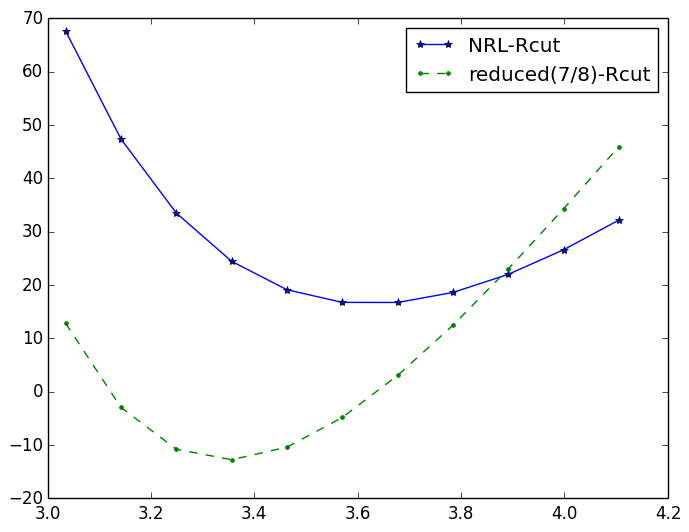

PyObject <matplotlib.legend.Legend object at 0x696a250>

In [12]:
plot(x,y,"*-")
plot(x,z,".--")
legend(("NRL-Rcut", "reduced(7/8)-Rcut"))

### bond tests of Silicon

In [13]:
# create the supercell
n = 3

at = bulk("Si"; cubic=true)
at = repeat(at, (n, n, n))
set_pbc!(at, [true, true, true])

X = positions(at)
print("number of atoms = ", length(at), "\n")

CELL = get_cell(at)
bond = CELL[1]/n
print("lattice constant = ", bond)

number of atoms = 216
lattice constant = 5.43

In [17]:
# set the fermi level

tbm = NRLTB.NRLTBModel(elem = NRLTB.Si_sp)
tbm.potential.beta = 200

TightBinding.potential_energy(at, tbm)
tbm.fixed_eF = false
TightBinding.update_eF!(at, tbm)
EF = tbm.eF

0.31772919355624474

In [18]:
# compute total energy with different cell size

m = 11
x = zeros(m)
y = zeros(m)

for k = 1:m    
    ratio = 1.0 + (k-6) * 0.03
    set_positions!(at, X * ratio)
    set_cell!(at, CELL * ratio)
    
    # update the fermi level, which is necessary when the temperature is now very low
    TightBinding.update!(at, tbm)
    
    x[k] = bond * ratio
    y[k] = TightBinding.potential_energy(at, tbm)
    println("ratio = ", ratio, "\t  energy = ", y[k])
end

ratio = 0.85	  energy = 40.43664570814637
ratio = 0.88	  energy = 29.961811886670233
ratio = 0.91	  energy = 21.199998620707298
ratio = 0.94	  energy = 14.922430501834578
ratio = 0.97	  energy = 11.31317364929463
ratio = 1.0	  energy = 10.08402165816547
ratio = 1.03	  energy = 10.918425230340542
ratio = 1.06	  energy = 13.491415799680345
ratio = 1.09	  energy = 17.463803452994505
ratio = 1.12	  energy = 22.488895688888956
ratio = 1.15	  energy = 28.135955899335833


In [21]:
###### perform the same calculations with smaller cutoff radius
# reduce the cutoff radius by 1/6
reload("NRLTB")

# reset the atoms
at = bulk("Si"; cubic=true)
at = repeat(at, (n, n, n))
set_pbc!(at, [true, true, true])
X = positions(at)
CELL = get_cell(at)
bond = CELL[1]/n


# set the fermi level
Rc = NRLTB.Si_sp.Rc
NRLTB.Si_sp.Rc = Rc * 5/6
print(" original curtoff radius = ", Rc, "\n reduced cutoff radius = ", NRLTB.Si_sp.Rc, "\n")

tbm = NRLTB.NRLTBModel(elem = NRLTB.Si_sp)
tbm.potential.beta = 200

TightBinding.potential_energy(at, tbm)
tbm.fixed_eF = false
TightBinding.update_eF!(at, tbm)
println(tbm.eF)

 original curtoff radius = 12.5
 reduced cutoff radius = 10.416666666666666
0.3928117606696973


In [22]:
# compute total energy with different cell size
# reload("NRLTB")

m = 11
x = zeros(m)
z = zeros(m)

for k = 1:m    
    ratio = 1.0 + (k-6) * 0.03
    set_positions!(at, X * ratio)
    set_cell!(at, CELL * ratio)
    
    # update the fermi level, which is necessary when the temperature is now very low
    TightBinding.update!(at, tbm)
    
    x[k] = bond * ratio
    z[k] = TightBinding.potential_energy(at, tbm)
    println("ratio = ", ratio, "  energy = ", z[k])
end

ratio = 0.85  energy = 10.719124676090493
ratio = 0.88  energy = 6.809765706087567
ratio = 0.91  energy = 5.3798215370580165
ratio = 0.94  energy = 6.438673485871115
ratio = 0.97  energy = 9.919971680445066
ratio = 1.0  energy = 15.571063507975834
ratio = 1.03  energy = 22.999797778245775
ratio = 1.06  energy = 31.81644248188988
ratio = 1.09  energy = 41.45364151691794
ratio = 1.12  energy = 51.69557032426117
ratio = 1.15  energy = 62.13233360224732


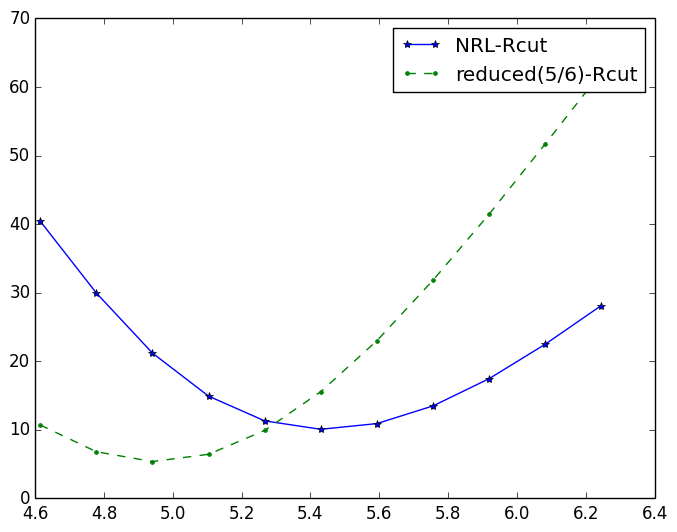

PyObject <matplotlib.legend.Legend object at 0xd518210>

In [23]:
plot(x,y,"*-")
plot(x,z,".--")
legend(("NRL-Rcut", "reduced(5/6)-Rcut"))

# Performance Tests (CO)

In [ ]:
push!(LOAD_PATH, "..")
using ASE, TestAtoms
import TightBinding
import NRLTB
import ProfileView, Base.Profile

In [ ]:
at = bulk("Al"; cubic=true)
at = repeat(at, (2, 2, 1))
set_pbc!(at, [false, false, true])
X = positions(at)
tbm = NRLTB.NRLTBModel(elem = NRLTB.Al_spd)
# tbm = TightBinding.ToyTB.ToyTBModel()
tbm.nkpoints = (0,0,0)
TestAtoms.test_potentialenergy(tbm, at)
set_positions!(at, X+0.1*rand(size(X)))
@time E = TightBinding.potential_energy(at, tbm)
set_positions!(at, X+0.1*rand(size(X)))
@time E = TightBinding.potential_energy(at, tbm)
set_positions!(at, X+0.1*rand(size(X)))
@time E = TightBinding.potential_energy(at, tbm)
set_positions!(at, X+0.1*rand(size(X)))
@time E = TightBinding.potential_energy(at, tbm)

@time df = TightBinding.forces(at, tbm);
@time df = TightBinding.forces(at, tbm);
@time df = TightBinding.forces(at, tbm);
@time df = TightBinding.forces(at, tbm);

In [ ]:
at = bulk("Al"; cubic=true)
at = repeat(at, (4, 4, 1))
X = positions(at)
set_pbc!(at, [false, false, true])
tbm = NRLTB.NRLTBModel(elem = NRLTB.Al_spd)
# tbm = TightBinding.ToyTB.ToyTBModel()
tbm.nkpoints = (0,0,4)

Profile.clear()
@profile f = TightBinding.potential_energy(at, tbm);
set_positions!(at, X+0.1*rand(size(X)))
@profile f = TightBinding.potential_energy(at, tbm);

In [ ]:
ProfileView.view()